
=== Testing Temperature Variation Throughout the Day ===
+------------------------------+-----------------+------------+-----------+--------+-----------+
| Location                     | Season          |   Midnight |   Morning |   Noon |   Evening |
+==============================+=================+============+===========+========+===========+
| Equator (Latitude 0°)        | Spring Equinox  |        8.3 |       8.2 |   35.7 |       7.3 |
+------------------------------+-----------------+------------+-----------+--------+-----------+
| Equator (Latitude 0°)        | Summer Solstice |      -16.4 |     -17.9 |  -17.1 |     -16.5 |
+------------------------------+-----------------+------------+-----------+--------+-----------+
| Equator (Latitude 0°)        | Fall Equinox    |        6   |       5.5 |   34.3 |       5.7 |
+------------------------------+-----------------+------------+-----------+--------+-----------+
| Equator (Latitude 0°)        | Winter Solstice |      -16.2 |     -

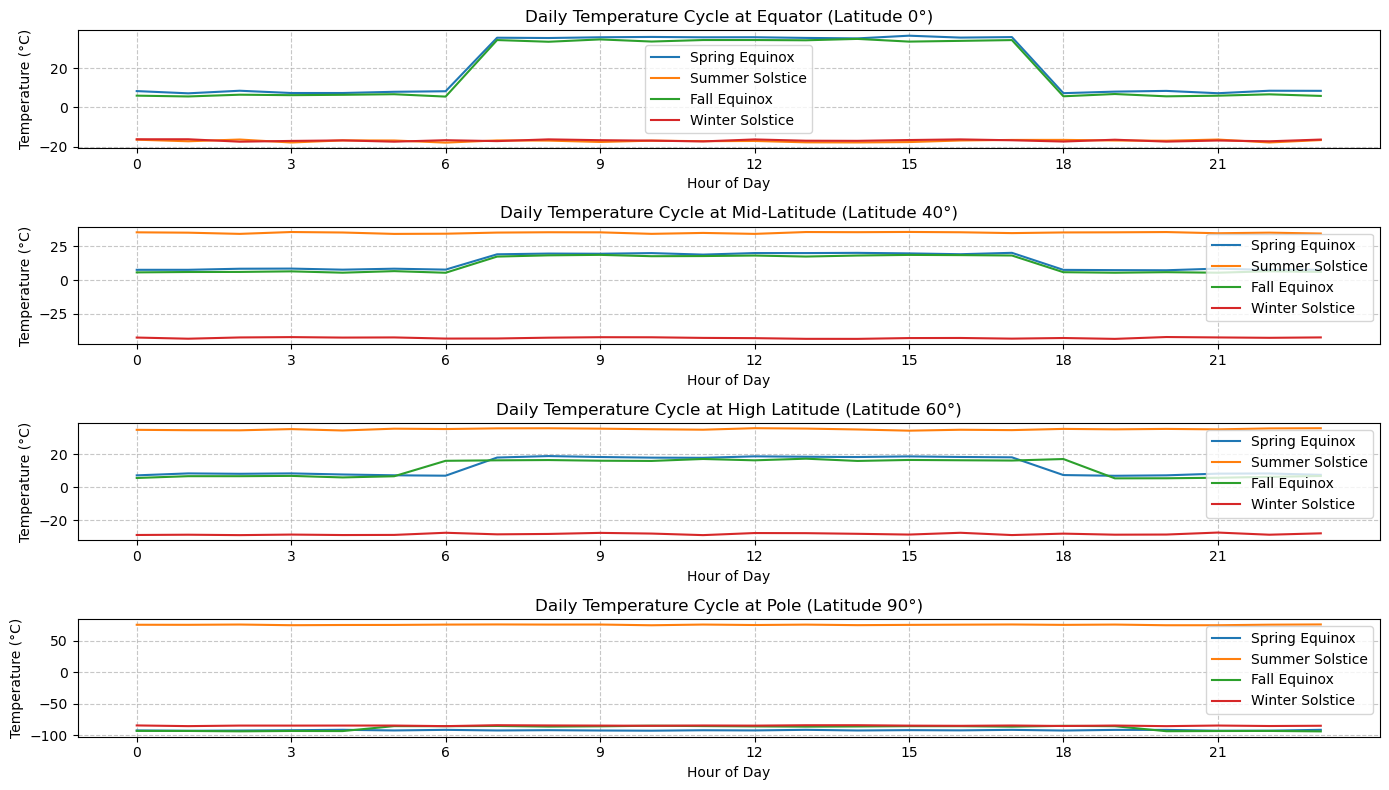


=== Habitability Analysis for Nexus ===
Overall Assessment: Moderately habitable
Optimal Zones: 6.3%
Livable Zones: 27.4%

Challenges:
- extreme_seasons: Axial tilt of 90.0° causes extreme seasonal variations
  Impact: Seasonal migration necessary for survival in mid to high latitudes
- permanent_day_night: Regions above 0.0° latitude experience extended day or night during solstices
  Impact: Polar regions difficult to inhabit without significant technological assistance

Settlement Recommendations:
- primary_settlement
  Location: Latitudes -80° at elevation 0m
  Reason: Most consistently optimal temperatures year-round
- nomadic
  Description: Seasonal migration recommended due to strong seasonal variations
- seasonal_migration
  Description: Establish seasonal settlements at different elevations
- polar_adaptation
  Reason: Must handle extended periods of darkness or continuous daylight
  Description: Polar settlements require special adaptations


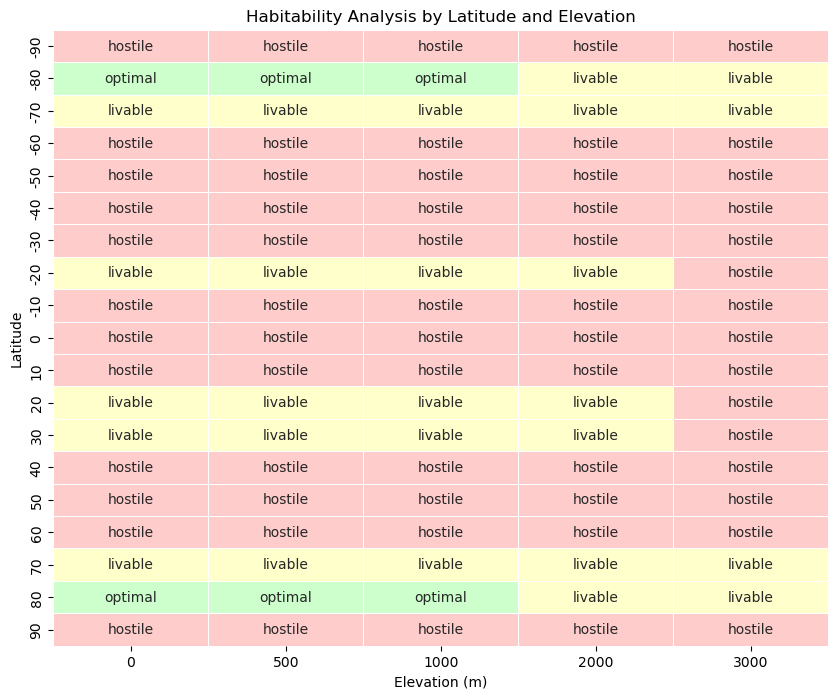

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from Solar import Planet, create_standard_system
import Weather
from IPython.display import display, HTML
# Auto reload modules
%load_ext autoreload


PLANET = Planet(
        name="Nexus",
        axial_tilt=90,
        rotation_period=12.0,
        axial_precession_period=12000,
        radius=6800,
        climate_type="temperate"
    )

# Test day/night cycle
def test_day_night_cycle():
    """Test temperature variation throughout a day"""
    # Create Earth-like planet (Nexus)
    nexus = PLANET
    
    # Test latitudes
    locations = [
        {"name": "Equator", "lat": 0},
        {"name": "Mid-Latitude", "lat": 40},
        {"name": "High Latitude", "lat": 60},
        {"name": "Pole", "lat": 90}
    ]
    
    # Test hours
    hours = [0, 6, 12, 18]
    hour_names = ["Midnight", "Morning", "Noon", "Evening"]
    
    # Test seasons
    seasons = [
        {"name": "Spring Equinox", "day": 0},
        {"name": "Summer Solstice", "day": 90},
        {"name": "Fall Equinox", "day": 180},
        {"name": "Winter Solstice", "day": 270}
    ]
    
    # Create results
    results = []
    
    # For each location, season and hour, calculate temperature
    for location in locations:
        for season in seasons:
            season_row = {"Location": f"{location['name']} (Latitude {location['lat']}°)", "Season": season["name"]}
            
            for i, hour in enumerate(hours):
                temp = Weather.estimate_temperature(
                    nexus, location["lat"], 0, 0, season["day"], hour, 0, 0
                )
                
                season_row[hour_names[i]] = round(temp, 1)
            
            results.append(season_row)
    
    # Convert to DataFrame
    day_night_df = pd.DataFrame(results)
    
    # Display results
    print("\n=== Testing Temperature Variation Throughout the Day ===")
    print(tabulate(day_night_df, headers="keys", tablefmt="grid", showindex=False))
    
    # Create a visualization of day/night cycle
    plt.figure(figsize=(14, 8))
    
    # Plot for each location
    for location in locations:
        plt.subplot(len(locations), 1, locations.index(location) + 1)
        
        # Get data for this location
        loc_data = day_night_df[day_night_df["Location"] == f"{location['name']} (Latitude {location['lat']}°)"]
        
        # Create hour range for smoother plot
        hour_range = np.linspace(0, 23, 24)
        
        # Plot each season
        for season in seasons:
            temps = []
            for hour in hour_range:
                temp = Weather.estimate_temperature(
                    nexus, location["lat"], 0, 0, season["day"], int(hour), 0, 0
                )
                temps.append(temp)
            
            plt.plot(hour_range, temps, label=season["name"])
        
        plt.title(f"Daily Temperature Cycle at {location['name']} (Latitude {location['lat']}°)")
        plt.xlabel("Hour of Day")
        plt.ylabel("Temperature (°C)")
        plt.xticks(range(0, 24, 3))
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return day_night_df


# Test habitability analysis
def test_habitability():
    """Test the habitability analysis function"""
    # Create Earth-like planet (Nexus)
    nexus = PLANET
    
    # Get habitability analysis
    analysis = Weather.analyze_habitability(nexus)
    
    # Display overview
    print("\n=== Habitability Analysis for Nexus ===")
    print(f"Overall Assessment: {analysis['overall_assessment']}")
    print(f"Optimal Zones: {analysis['optimal_percentage']:.1f}%")
    print(f"Livable Zones: {analysis['livable_percentage']:.1f}%")
    
    # Display challenges
    print("\nChallenges:")
    for challenge in analysis['challenges']:
        print(f"- {challenge['type']}: {challenge['description']}")
        print(f"  Impact: {challenge['impact']}")
    
    # Display recommendations
    print("\nSettlement Recommendations:")
    for rec in analysis['settlement_recommendations']:
        print(f"- {rec['type']}")
        if 'location' in rec:
            print(f"  Location: {rec['location']}")
        if 'reason' in rec:
            print(f"  Reason: {rec['reason']}")
        if 'description' in rec:
            print(f"  Description: {rec['description']}")
    
    # Create a visualization of habitable zones
    zones_df = pd.DataFrame(analysis['habitable_zones'])
    
    # Create a pivot table for visualization
    pivot = zones_df.pivot(index="latitude", columns="elevation", values="status")
    
    # Map status to numeric values for heatmap
    status_map = {"optimal": 2, "livable": 1, "hostile": 0}
    pivot_numeric = pivot.applymap(lambda x: status_map.get(x, 0))
    
    # Create custom colormap
    cmap = plt.cm.colors.ListedColormap(['#ffcccc', '#ffffcc', '#ccffcc'])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_numeric, annot=pivot, fmt="", cmap=cmap, 
               linewidths=0.5, cbar=False)
    plt.title("Habitability Analysis by Latitude and Elevation")
    plt.xlabel("Elevation (m)")
    plt.ylabel("Latitude")
    plt.show()
    
    return analysis

# Main test function
def run_all_tests():
    """Run all weather tests"""
    day_night_results = test_day_night_cycle()
    habitability_results = test_habitability()
    
    return {
        "day_night_results": day_night_results,
        "habitability_results": habitability_results
    }

# Run the tests
if __name__ == "__main__":
    results = run_all_tests()

Tracking subsolar points over 360 days with 180-day intervals...
  Progress: 0/360 days simulated
  Progress: 180/360 days simulated
Tracking complete.

Top 3 locations with highest sun exposure on Variare:
  Location 1: Lat 0.0°, Lon 0.0°
    Max Temp: 20.0°C, Avg Temp: 20.0°C
    Sun Exposure Score: 16.4


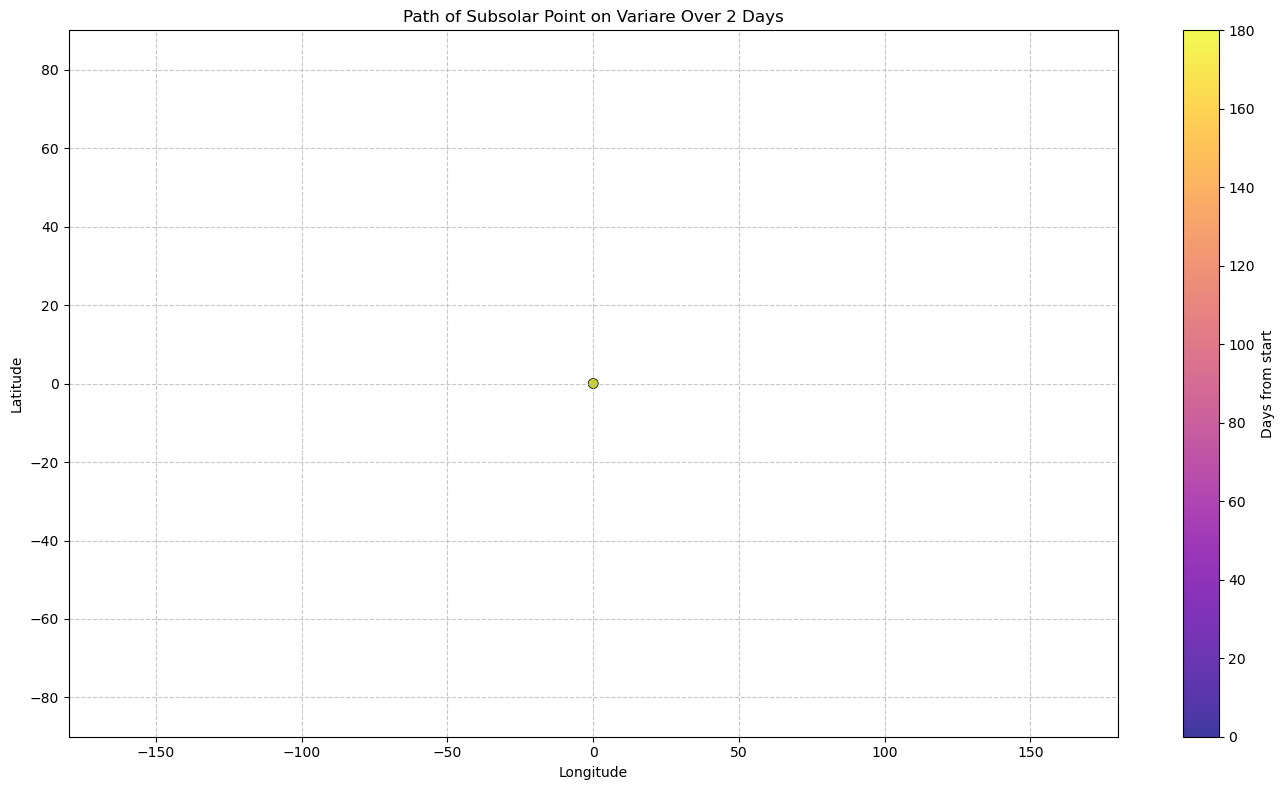

Added city Sun City 1 at Lat 0.0°, Lon 0.0° on Variare
Added city Equator City at Lat 0°, Lon 0° on Variare

Climate analysis for cities on Variare:


,City,Latitude,Longitude,Elevation (m),Avg Temp (°C),Min Temp (°C),Max Temp (°C),Temp Range (°C),Daylight Range (h),Current Weather
0,Sun City 1,0.0,0.0,372,-0.111736,-19.478054,33.31777,52.795824,0.0,A cold day with heavy snowfall. The extreme ax...
1,Equator City,0.0,0.0,500,-0.943736,-20.310054,32.48577,52.795824,0.0,A cold day with heavy snowfall. The extreme ax...



Seasonal details for each city:

Sun City 1 (Lat 0.0°, Lon 0.0°, Elevation 372m):
  Spring Equinox (Spring): Day 33.3°C, Night 5.9°C, Daylight: 6.0h
  Summer Solstice (Summer): Day -19.5°C, Night -18.8°C, Daylight: 6.0h
  Fall Equinox (Fall): Day 31.9°C, Night 3.6°C, Daylight: 6.0h
  Winter Solstice (Winter): Day -18.7°C, Night -18.6°C, Daylight: 6.0h

Equator City (Lat 0°, Lon 0°, Elevation 500m):
  Spring Equinox (Spring): Day 32.5°C, Night 5.1°C, Daylight: 6.0h
  Summer Solstice (Summer): Day -20.3°C, Night -19.7°C, Daylight: 6.0h
  Fall Equinox (Fall): Day 31.1°C, Night 2.8°C, Daylight: 6.0h
  Winter Solstice (Winter): Day -19.5°C, Night -19.4°C, Daylight: 6.0h
Generating global temperature map for Variare on day 0...


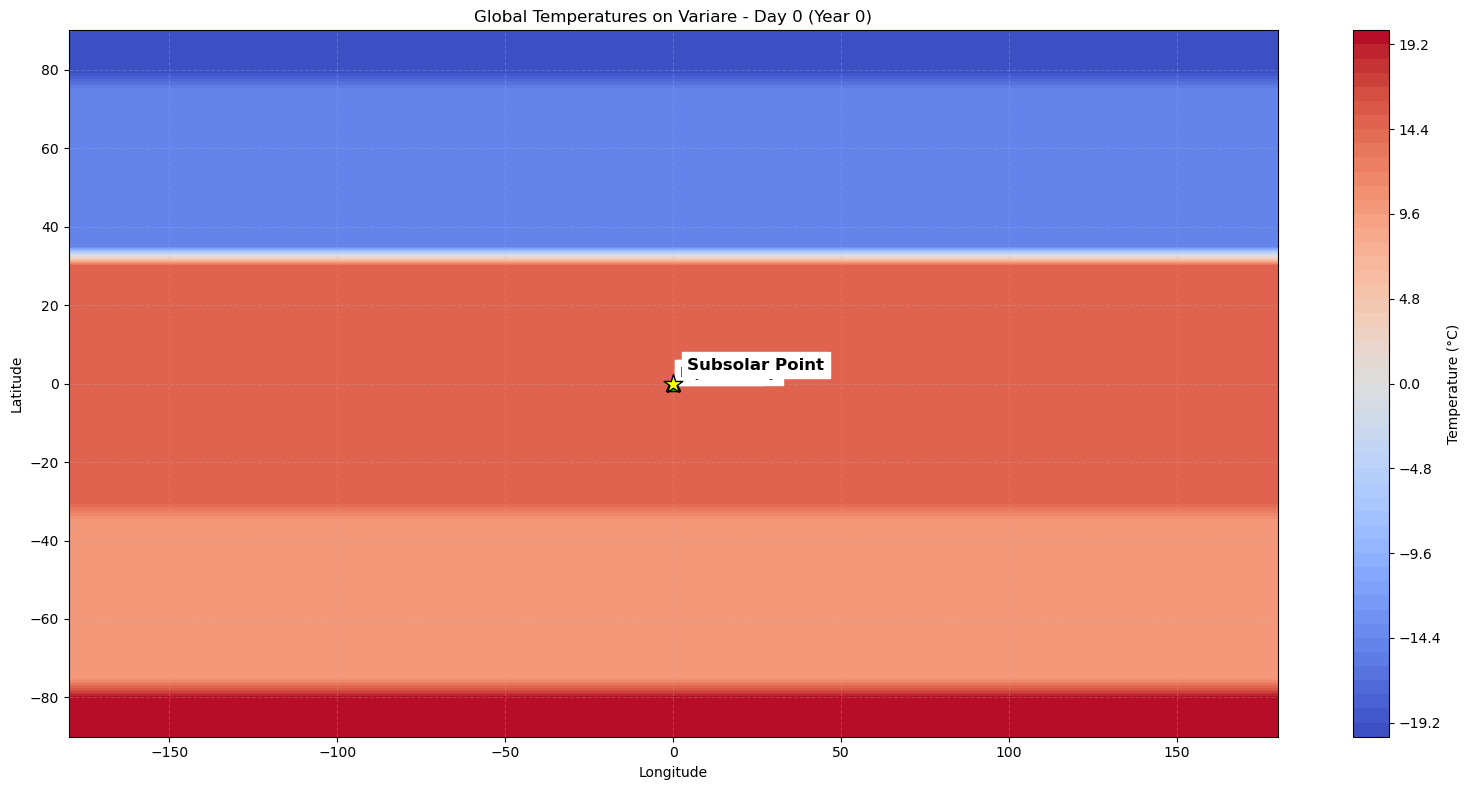

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from datetime import datetime, timedelta
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from IPython.display import display, clear_output
import time
import random

# Import from your modules - adjust these imports as needed based on your actual module structure
from Solar import Planet, SolarSystem, MoonSystem, create_standard_system, nexus_to_absolute
import Weather as weather_module

class SimulationRunner:
    """Class to run a solar system simulation and track sun positions over time."""
    
    def __init__(self, solar_system=None, start_year=0, start_day=0):
        """
        Initialize the simulation with a solar system.
        
        Parameters:
        -----------
        solar_system : SolarSystem, optional
            Solar system to simulate. If None, creates the standard system.
        start_year : int
            Starting year for the simulation
        start_day : int
            Starting day for the simulation
        """
        self.solar_system = solar_system if solar_system else create_standard_system()
        self.planet_markers = {}
        self.current_year = start_year
        self.current_day = start_day
        self.current_hour = 12
        self.total_days = 0
        
        # Initialize tracking for subsolar points
        self.tracked_subsolar_points = {planet.name: [] for planet in self.solar_system.planets}
        self.hottest_points = {planet.name: [] for planet in self.solar_system.planets}
        
        # Initialize city locations
        self.cities = {planet.name: [] for planet in self.solar_system.planets}
    
    def step_time(self, days=1, hours=0):
        """
        Advance the simulation by a specific number of days and hours.
        
        Parameters:
        -----------
        days : int
            Number of days to advance
        hours : int
            Number of hours to advance
        """
        total_hours = self.current_hour + hours
        added_days = days + total_hours // 24
        self.current_hour = total_hours % 24
        
        self.total_days += added_days
        
        # Update current date
        total_days = self.current_day + added_days
        year_advance = total_days // 360
        self.current_year += year_advance
        self.current_day = total_days % 360
    
    def track_subsolar_points(self, duration_days=360, step_days=10):
        """
        Track subsolar points on all planets over time.
        
        Parameters:
        -----------
        duration_days : int
            Total duration to track in days
        step_days : int
            Step size in days between measurements
        
        Returns:
        --------
        dict
            Dictionary of tracked points for each planet
        """
        start_year = self.current_year
        start_day = self.current_day
        
        print(f"Tracking subsolar points over {duration_days} days with {step_days}-day intervals...")
        
        for day_offset in range(0, duration_days, step_days):
            # Calculate current time
            total_days = start_day + day_offset
            year = start_year + total_days // 360
            day = total_days % 360
            
            # Get subsolar points for all planets
            for planet in self.solar_system.planets:
                subsolar_lat, subsolar_lon = planet.get_subsolar_point(year, day)
                
                # Store the point with timestamp
                self.tracked_subsolar_points[planet.name].append({
                    'year': year,
                    'day': day,
                    'lat': subsolar_lat,
                    'lon': subsolar_lon,
                    'day_offset': day_offset
                })
                
                # Find the hottest point (may differ from subsolar due to lag effects,
                # but for simplicity, we're using subsolar as an approximation)
                self.hottest_points[planet.name].append({
                    'year': year,
                    'day': day,
                    'lat': subsolar_lat,
                    'lon': subsolar_lon,
                    'temp': self._estimate_max_temperature(planet, year, day, subsolar_lat, subsolar_lon)
                })
            
            # Progress indicator
            if day_offset % (duration_days // 10) == 0:
                print(f"  Progress: {day_offset}/{duration_days} days simulated")
        
        print("Tracking complete.")
        return self.tracked_subsolar_points
    
    def _estimate_max_temperature(self, planet, year, day, lat, lon, elevation=0):
        """
        Estimate the maximum temperature at a given location.
        
        Parameters:
        -----------
        planet : Planet
            Planet object
        year : int
            Current year
        day : int
            Current day
        lat : float
            Latitude in degrees
        lon : float
            Longitude in degrees
        elevation : float
            Elevation in meters
            
        Returns:
        --------
        float
            Estimated maximum temperature
        """
        # Sample temperatures throughout the day to find maximum
        max_temp = float('-inf')
        for hour in range(0, 24, 2):  # Check every 2 hours
            try:
                if planet.name.lower() == "variare":
                    temp = weather_module.get_variare_temperature(lat, lon, day, hour, 0, elevation)["temperature"]
                else:
                    temp = weather_module.estimate_temperature(planet, lat, lon, year, day, hour, 0, elevation)
                max_temp = max(max_temp, temp)
            except Exception as e:
                print(f"Error estimating temperature: {e}")
                max_temp = 20  # Fallback default value
        
        return max_temp
    
    def find_closest_points_to_sun(self, planet_name, top_n=5):
        """
        Find the locations that get closest to the sun (hottest) during the year.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet to analyze
        top_n : int
            Number of top points to return
            
        Returns:
        --------
        list
            List of top sun-exposed locations
        """
        if planet_name not in self.hottest_points or not self.hottest_points[planet_name]:
            print(f"No data available for planet {planet_name}. Run track_subsolar_points() first.")
            return []
        
        # Convert to DataFrame for easier analysis
        points_df = pd.DataFrame(self.hottest_points[planet_name])
        
        # Group points by approximate location (rounded to nearest degree)
        points_df['lat_rounded'] = points_df['lat'].round(0)
        points_df['lon_rounded'] = points_df['lon'].round(0)
        
        # For each location, calculate metrics like max temperature, average temperature,
        # time spent as the hottest spot, etc.
        location_stats = points_df.groupby(['lat_rounded', 'lon_rounded']).agg({
            'temp': ['max', 'mean', 'count']
        }).reset_index()
        
        # Flatten the column names
        location_stats.columns = ['lat', 'lon', 'max_temp', 'avg_temp', 'count']
        
        # Calculate a "sun exposure score" - combination of max temp, avg temp, and time as hottest spot
        location_stats['sun_exposure'] = (location_stats['max_temp'] * 0.4 + 
                                        location_stats['avg_temp'] * 0.4 + 
                                        location_stats['count'] * 0.2)
        
        # Sort by sun exposure score and get top N
        top_locations = location_stats.sort_values('sun_exposure', ascending=False).head(top_n)
        
        print(f"\nTop {top_n} locations with highest sun exposure on {planet_name}:")
        for i, loc in top_locations.iterrows():
            print(f"  Location {i+1}: Lat {loc['lat']:.1f}°, Lon {loc['lon']:.1f}°")
            print(f"    Max Temp: {loc['max_temp']:.1f}°C, Avg Temp: {loc['avg_temp']:.1f}°C")
            print(f"    Sun Exposure Score: {loc['sun_exposure']:.1f}")
        
        return top_locations
    
    def add_city(self, planet_name, lat, lon, name, elevation=0, description=""):
        """
        Add a city at the specified location.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet
        lat : float
            Latitude in degrees
        lon : float
            Longitude in degrees
        name : str
            Name of the city
        elevation : float
            Elevation in meters
        description : str
            Description of the city
            
        Returns:
        --------
        dict
            City information
        """
        city = {
            'name': name,
            'lat': lat,
            'lon': lon,
            'elevation': elevation,
            'description': description
        }
        
        if planet_name in self.cities:
            self.cities[planet_name].append(city)
            print(f"Added city {name} at Lat {lat}°, Lon {lon}° on {planet_name}")
        else:
            print(f"Planet {planet_name} not found in the solar system")
        
        return city
    
    def analyze_cities(self, planet_name):
        """
        Analyze climate conditions at all cities on a planet.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet
            
        Returns:
        --------
        pd.DataFrame
            Climate analysis for all cities
        """
        if planet_name not in self.cities or not self.cities[planet_name]:
            print(f"No cities defined on {planet_name}.")
            return None
        
        planet = self.solar_system.get_planet_by_name(planet_name)
        if not planet:
            print(f"Planet {planet_name} not found.")
            return None
        
        analysis_results = []
        
        # Sample different times of year
        sample_days = [0, 90, 180, 270]  # Spring, Summer, Fall, Winter equinoxes/solstices
        day_names = ["Spring Equinox", "Summer Solstice", "Fall Equinox", "Winter Solstice"]
        
        for city in self.cities[planet_name]:
            city_analysis = {
                'name': city['name'],
                'lat': city['lat'],
                'lon': city['lon'],
                'elevation': city['elevation']
            }
            
            # Annual temperature statistics
            temps = []
            daylight_hours = []
            seasonal_data = []
            
            for i, day in enumerate(sample_days):
                # Check temperature at different times
                day_temp = weather_module.estimate_temperature(
                    planet, city['lat'], city['lon'], 
                    self.current_year, day, 12, 0, city['elevation']
                )
                night_temp = weather_module.estimate_temperature(
                    planet, city['lat'], city['lon'], 
                    self.current_year, day, 0, 0, city['elevation']
                )
                
                # Get daylight hours
                hours = planet.get_daylight_hours(city['lat'], self.current_year, day)
                
                # Get season
                season = planet.get_season(city['lat'], self.current_year, day)
                
                seasonal_data.append({
                    'period': day_names[i],
                    'day_temp': day_temp,
                    'night_temp': night_temp,
                    'daylight_hours': hours,
                    'season': season
                })
                
                temps.extend([day_temp, night_temp])
                daylight_hours.append(hours)
            
            # Calculate statistics
            city_analysis['max_temp'] = max(temps)
            city_analysis['min_temp'] = min(temps)
            city_analysis['avg_temp'] = sum(temps) / len(temps)
            city_analysis['temp_range'] = city_analysis['max_temp'] - city_analysis['min_temp']
            city_analysis['daylight_range'] = max(daylight_hours) - min(daylight_hours)
            city_analysis['seasonal_data'] = seasonal_data
            
            # Get weather description for current time
            try:
                weather = weather_module.get_weather_conditions(
                    planet, city['lat'], city['lon'], 
                    self.current_year, self.current_day, 12, 0, city['elevation']
                )
                city_analysis['current_weather'] = weather
            except Exception as e:
                print(f"Error getting weather for {city['name']}: {e}")
                city_analysis['current_weather'] = {
                    'description': 'Weather data unavailable',
                    'temperature': city_analysis['avg_temp']
                }
            
            analysis_results.append(city_analysis)
        
        # Convert to DataFrame
        df = pd.DataFrame([
            {
                'City': r['name'],
                'Latitude': r['lat'],
                'Longitude': r['lon'],
                'Elevation (m)': r['elevation'],
                'Avg Temp (°C)': r['avg_temp'],
                'Min Temp (°C)': r['min_temp'],
                'Max Temp (°C)': r['max_temp'],
                'Temp Range (°C)': r['temp_range'],
                'Daylight Range (h)': r['daylight_range'],
                'Current Weather': r['current_weather'].get('description', 'Unknown')
            } for r in analysis_results
        ])
        
        print(f"\nClimate analysis for cities on {planet_name}:")
        display(df)
        
        # Print detailed seasonal information
        print("\nSeasonal details for each city:")
        for city in analysis_results:
            print(f"\n{city['name']} (Lat {city['lat']}°, Lon {city['lon']}°, Elevation {city['elevation']}m):")
            for season in city['seasonal_data']:
                print(f"  {season['period']} ({season['season']}): Day {season['day_temp']:.1f}°C, "
                     f"Night {season['night_temp']:.1f}°C, Daylight: {season['daylight_hours']:.1f}h")
        
        return analysis_results
    
    def visualize_subsolar_path(self, planet_name):
        """
        Visualize the path of the subsolar point on a planet over time.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet
        """
        if planet_name not in self.tracked_subsolar_points or not self.tracked_subsolar_points[planet_name]:
            print(f"No tracked data for {planet_name}. Run track_subsolar_points() first.")
            return
        
        # Convert to DataFrame
        path_df = pd.DataFrame(self.tracked_subsolar_points[planet_name])
        
        # Create figure
        plt.figure(figsize=(14, 8))
        
        # Plot the path of the subsolar point
        plt.scatter(path_df['lon'], path_df['lat'], 
                   c=path_df['day_offset'], cmap='plasma', 
                   s=50, alpha=0.8, edgecolors='k', linewidths=0.5)
        
        # Add colorbar
        cbar = plt.colorbar()
        cbar.set_label('Days from start')
        
        # Plot cities if they exist
        if planet_name in self.cities and self.cities[planet_name]:
            city_lats = [city['lat'] for city in self.cities[planet_name]]
            city_lons = [city['lon'] for city in self.cities[planet_name]]
            city_names = [city['name'] for city in self.cities[planet_name]]
            
            plt.scatter(city_lons, city_lats, marker='^', color='red', s=100, zorder=5)
            
            for i, name in enumerate(city_names):
                plt.annotate(name, (city_lons[i], city_lats[i]), 
                           xytext=(5, 5), textcoords='offset points', fontsize=10)
        
        # Add grid
        plt.grid(linestyle='--', alpha=0.7)
        
        # Set plot limits and labels
        plt.xlim(-180, 180)
        plt.ylim(-90, 90)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Path of Subsolar Point on {planet_name} Over {len(path_df)} Days')
        
        # Show the plot
        plt.tight_layout()
        plt.show()
    
    def visualize_global_temperatures(self, planet_name, day_of_year=None):
        """
        Visualize global temperatures on a planet for a specific day.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet
        day_of_year : int, optional
            Day of year to visualize. If None, uses current day.
        """
        planet = self.solar_system.get_planet_by_name(planet_name)
        if not planet:
            print(f"Planet {planet_name} not found.")
            return
        
        if day_of_year is None:
            day_of_year = self.current_day
        
        print(f"Generating global temperature map for {planet_name} on day {day_of_year}...")
        
        # Create a grid of lat/lon points
        lats = np.linspace(-90, 90, 37)  # 5-degree steps
        lons = np.linspace(-180, 180, 73)  # 5-degree steps
        
        # Create empty grid for temperatures
        temp_grid = np.zeros((len(lats), len(lons)))
        
        # Fill in the grid with temperatures
        for i, lat in enumerate(lats):
            for j, lon in enumerate(lons):
                try:
                    if planet_name.lower() == "variare":
                        temp = weather_module.get_variare_temperature(lat, lon, day_of_year)["temperature"]
                    else:
                        temp = weather_module.estimate_temperature(planet, lat, lon, self.current_year, day_of_year, 12, 0, 0)
                    temp_grid[i, j] = temp
                except Exception as e:
                    print(f"Error at lat {lat}, lon {lon}: {e}")
                    temp_grid[i, j] = 0
        
        # Create a custom colormap for temperature
        cmap = plt.cm.coolwarm
        
        # Create figure
        plt.figure(figsize=(16, 8))
        
        # Create the heatmap
        plt.contourf(lons, lats, temp_grid, 50, cmap=cmap)
        
        # Add colorbar
        cbar = plt.colorbar()
        cbar.set_label('Temperature (°C)')
        
        # Plot cities if they exist
        if planet_name in self.cities and self.cities[planet_name]:
            city_lats = [city['lat'] for city in self.cities[planet_name]]
            city_lons = [city['lon'] for city in self.cities[planet_name]]
            city_names = [city['name'] for city in self.cities[planet_name]]
            
            plt.scatter(city_lons, city_lats, marker='^', color='lime', s=100, edgecolors='black', zorder=5)
            
            for i, name in enumerate(city_names):
                plt.annotate(name, (city_lons[i], city_lats[i]), 
                           xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold',
                           color='black', backgroundcolor='white')
        
        # Add subsolar point for this day
        subsolar_lat, subsolar_lon = planet.get_subsolar_point(self.current_year, day_of_year)
        plt.scatter([subsolar_lon], [subsolar_lat], marker='*', color='yellow', s=200, 
                   edgecolors='black', zorder=6)
        plt.annotate('Subsolar Point', (subsolar_lon, subsolar_lat), 
                   xytext=(10, 10), textcoords='offset points', fontsize=12, fontweight='bold',
                   color='black', backgroundcolor='white')
        
        # Add grid
        plt.grid(linestyle='--', alpha=0.3)
        
        # Set plot limits and labels
        plt.xlim(-180, 180)
        plt.ylim(-90, 90)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Global Temperatures on {planet_name} - Day {day_of_year} (Year {self.current_year})')
        
        # Show the plot
        plt.tight_layout()
        plt.show()
    
    def recommend_city_locations(self, planet_name, num_recommendations=3):
        """
        Recommend optimal city locations based on climate analysis.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet
        num_recommendations : int
            Number of recommendations to provide
            
        Returns:
        --------
        list
            List of recommended locations
        """
        planet = self.solar_system.get_planet_by_name(planet_name)
        if not planet:
            print(f"Planet {planet_name} not found.")
            return []
        
        try:
            # Get planet habitability analysis
            habitability = weather_module.analyze_habitability(planet, self.current_year, self.current_day)
            
            # Filter for optimal zones
            optimal_zones = [zone for zone in habitability['habitable_zones'] 
                           if zone['status'] == 'optimal']
            
            if not optimal_zones:
                optimal_zones = [zone for zone in habitability['habitable_zones'] 
                               if zone['status'] == 'livable']
            
            if not optimal_zones:
                print(f"No suitable zones found on {planet_name}. Consider a different planet.")
                return []
            
            # Sort by best average temperature (closest to 21°C)
            optimal_zones = sorted(optimal_zones, key=lambda z: abs(z['avg_temperature'] - 21))
            
            recommendations = []
            
            # Convert best zones to recommendations
            for i, zone in enumerate(optimal_zones[:num_recommendations]):
                # Randomly select longitude within ±20° band
                longitude = np.random.randint(-180, 180)
                
                # Check for extreme temperature variation
                if zone['seasonal_range'] > 25:
                    qualifier = "May require thermal regulation to manage seasonal changes"
                else:
                    qualifier = "Stable year-round climate"
                
                recommendation = {
                    'name': f"Recommended Site {i+1}",
                    'lat': zone['latitude'],
                    'lon': longitude,
                    'elevation': zone['elevation'],
                    'avg_temp': zone['avg_temperature'],
                    'temp_range': zone['seasonal_range'],
                    'status': zone['status'],
                    'notes': qualifier
                }
                
                recommendations.append(recommendation)
                
                print(f"\nRecommended Location {i+1} on {planet_name}:")
                print(f"  Location: Latitude {zone['latitude']}°, Longitude {longitude}°, Elevation {zone['elevation']}m")
                print(f"  Climate: Average temperature {zone['avg_temperature']:.1f}°C, Seasonal range {zone['seasonal_range']:.1f}°C")
                print(f"  Daylight: Daily variation {zone['daily_range']:.1f}°C")
                print(f"  Evaluation: {qualifier}")
            
            return recommendations
        
        except Exception as e:
            print(f"Error generating recommendations: {e}")
            return []
    
    def simulate_year(self, planet_name, speed=1, show_temperature=True):
        """
        Simulate and visualize a year on the planet with animations.
        
        Parameters:
        -----------
        planet_name : str
            Name of the planet
        speed : int
            Simulation speed factor
        show_temperature : bool
            Whether to show temperature instead of just subsolar point
        """
        planet = self.solar_system.get_planet_by_name(planet_name)
        if not planet:
            print(f"Planet {planet_name} not found.")
            return
        
        # Save initial time
        init_year = self.current_year
        init_day = self.current_day
        
        # Create a figure
        plt.figure(figsize=(12, 10))
        
        for day in range(0, 360, speed):
            # Update current time
            self.current_day = day
            
            # Clear previous plot
            plt.clf()
            
            # If showing temperature map
            if show_temperature:
                # Create a grid of lat/lon points
                lats = np.linspace(-90, 90, 37)  # 5-degree steps
                lons = np.linspace(-180, 180, 73)  # 5-degree steps
                
                # Create empty grid for temperatures
                temp_grid = np.zeros((len(lats), len(lons)))
                
                # Fill in the grid with temperatures (this can be slow)
                for i, lat in enumerate(lats):
                    for j, lon in enumerate(lons):
                        try:
                            if planet_name.lower() == "variare":
                                temp = weather_module.get_variare_temperature(lat, lon, day)["temperature"]
                            else:
                                temp = weather_module.estimate_temperature(planet, lat, lon, self.current_year, day, 12, 0, 0)
                            temp_grid[i, j] = temp
                        except Exception:
                            temp_grid[i, j] = 0
                
                # Create the heatmap
                plt.contourf(lons, lats, temp_grid, 50, cmap=plt.cm.coolwarm)
                plt.colorbar(label='Temperature (°C)')
            else:
                # Just show a simple map
                plt.xlim(-180, 180)
                plt.ylim(-90, 90)
                plt.grid(linestyle='--', alpha=0.5)
            
            # Get and plot subsolar point
            subsolar_lat, subsolar_lon = planet.get_subsolar_point(self.current_year, day)
            plt.scatter([subsolar_lon], [subsolar_lat], marker='*', color='yellow', s=200, 
                       edgecolors='black', zorder=5)
            
            # Plot cities if they exist
            if planet_name in self.cities and self.cities[planet_name]:
                city_lats = [city['lat'] for city in self.cities[planet_name]]
                city_lons = [city['lon'] for city in self.cities[planet_name]]
                city_names = [city['name'] for city in self.cities[planet_name]]
                
                plt.scatter(city_lons, city_lats, marker='^', color='lime', s=100, 
                           edgecolors='black', zorder=4)
                
                for i, name in enumerate(city_names):
                    plt.annotate(name, (city_lons[i], city_lats[i]), 
                               xytext=(5, 5), textcoords='offset points')
                    
                    # For each city, get current temperature and daylight status
                    for city in self.cities[planet_name]:
                        is_daylight = planet.is_daylight(city['lat'], city['lon'], self.current_year, day, 12)
                        try:
                            temp = weather_module.estimate_temperature(planet, city['lat'], city['lon'], 
                                                                    self.current_year, day, 12, 0, city['elevation'])
                            plt.annotate(f"{temp:.1f}°C", (city['lon'], city['lat']), 
                                       xytext=(5, -15), textcoords='offset points',
                                       color='black' if is_daylight else 'blue')
                        except:
                            pass
            
            # Set plot labels
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Day {day} on {planet_name} | Subsolar: Lat {subsolar_lat:.1f}°, Lon {subsolar_lon:.1f}°')
            
            # Draw and pause to create animation effect
            plt.draw()
            plt.pause(1)
            
            # For Jupyter/IPython, clear output and display
            if hasattr(plt, 'close'):
                clear_output(wait=True)
                display(plt.gcf())
                time.sleep(0.1)
        
        # Restore initial time
        self.current_year = init_year
        self.current_day = init_day
        
        # Keep the final plot visible
        plt.show()


# Main execution example
if __name__ == "__main__":
    # Create simulation runner with standard system
    sim = SimulationRunner()
    planet = "Variare"
    
    # Track subsolar points over a year with 5-day steps
    sim.track_subsolar_points(duration_days=360, step_days=180)
    
    # Find the hottest spots on a specific planet
    top_spots = sim.find_closest_points_to_sun(planet, top_n=3)
    
    # Visualize the path of the subsolar point
    sim.visualize_subsolar_path(planet)
    
    # Add city locations based on the top spots
    for i, spot in top_spots.iterrows():
        sim.add_city(planet, 
                    spot['lat'], 
                    spot['lon'], 
                    f"Sun City {i+1}", 
                    elevation=random.randint(0, 1000),
                    description=f"A city optimized for solar energy capture")
    
    # Add some other strategic city locations
    sim.add_city(planet, 0, 0, "Equator City", elevation=500, 
               description="Trade hub at the equator")
    
    # Analyze climate at all city locations
    sim.analyze_cities(planet)
    
    # Visualize global temperature map
    sim.visualize_global_temperatures(planet)
    
    # Simulate a full year showing the movement of the subsolar point
    #sim.simulate_year(planet, speed=5)

Planet information:
--------------------------------------------------------------------------------
Planet          Day Length (hrs)   Axial Tilt (°)     Local Days/Year   
--------------------------------------------------------------------------------
Nexus           24.00              23.50              360.00            
Celeste         18.00              29.00              480.00            
Fortis Crags    48.00              10.00              180.00            
Percepio        6.00               25.00              1440.00           
Variare         12.00              90.00              720.00            
Synvios         20.00              20.00              432.00            

Subsolar Point Analysis:
--------------------------------------------------------------------------------
Planet          Min Lat (°)     Max Lat (°)     Lat Range (°)  
--------------------------------------------------------------------------------
Nexus           -23.50          23.50           47.00  

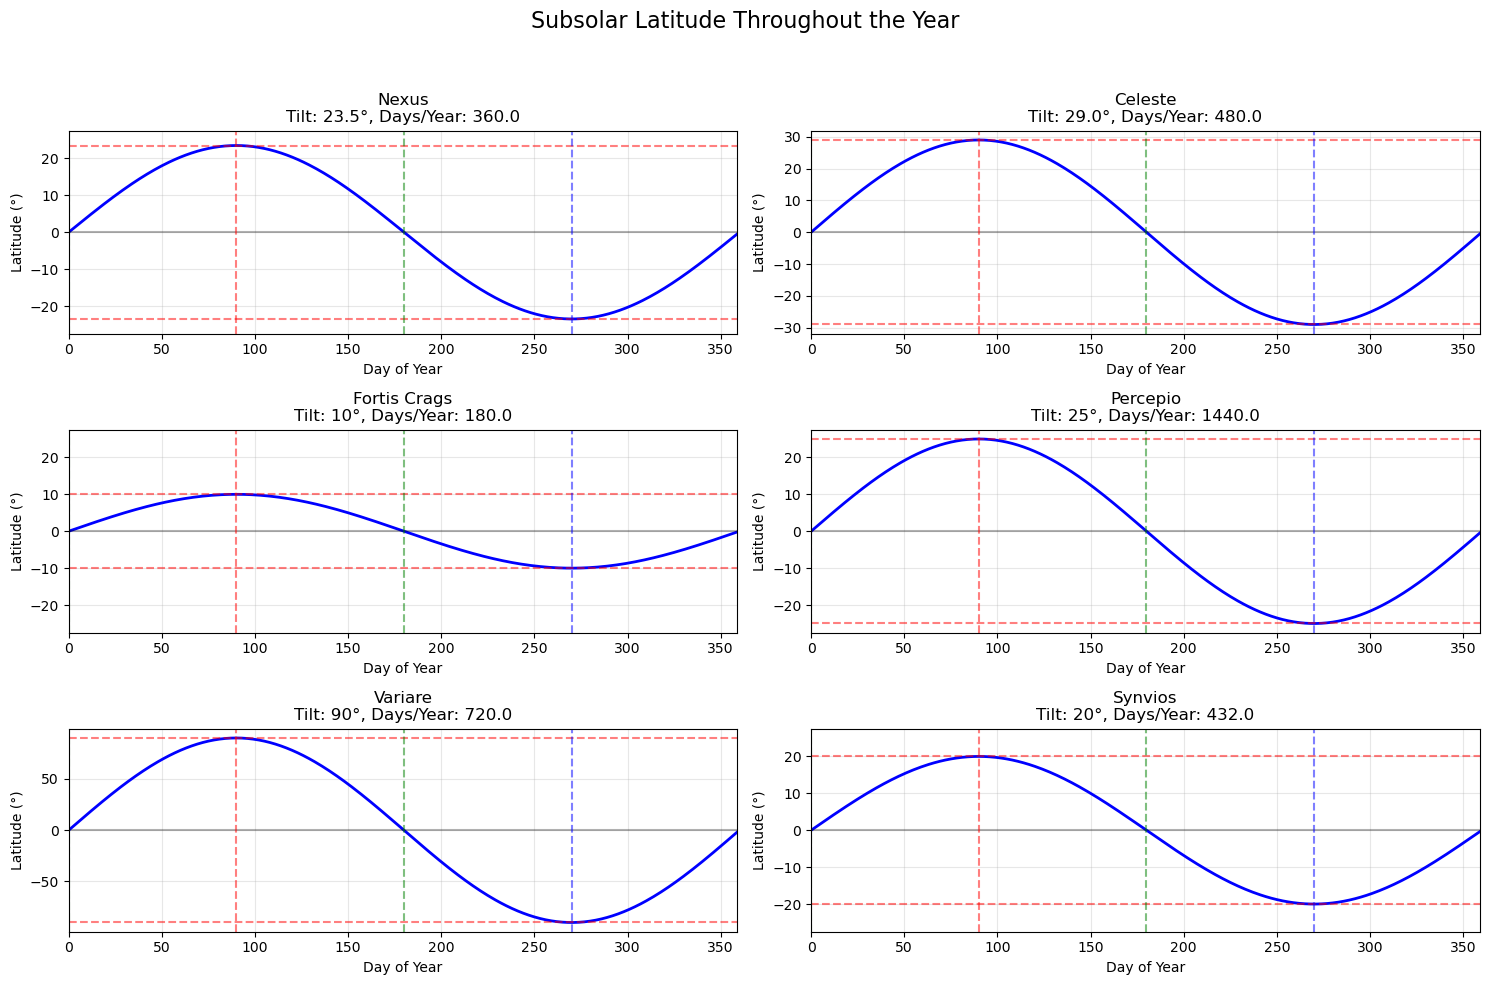

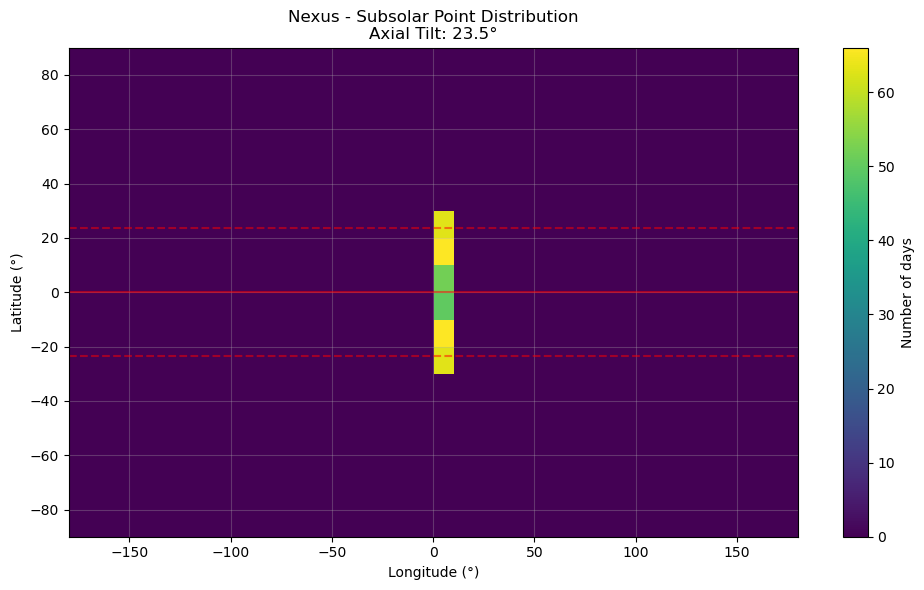

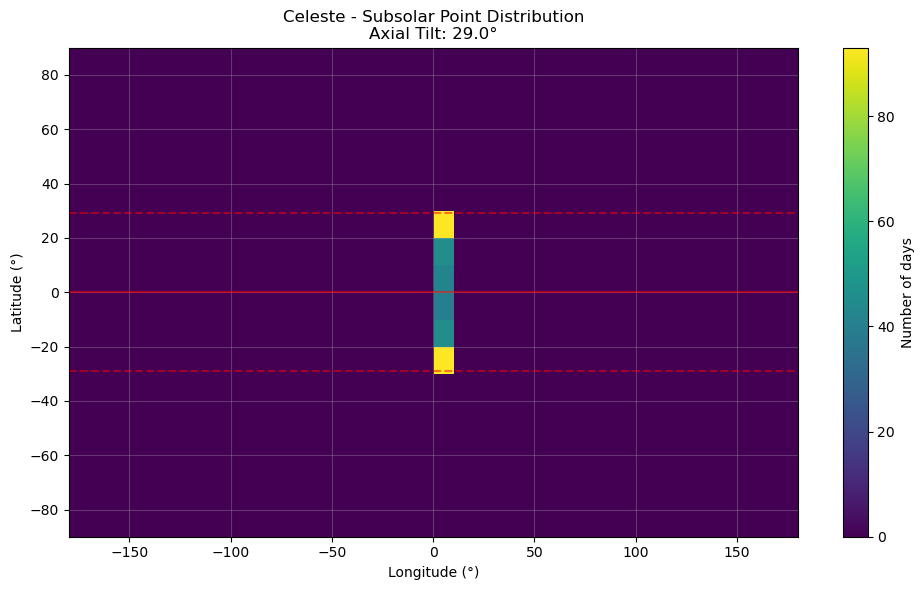

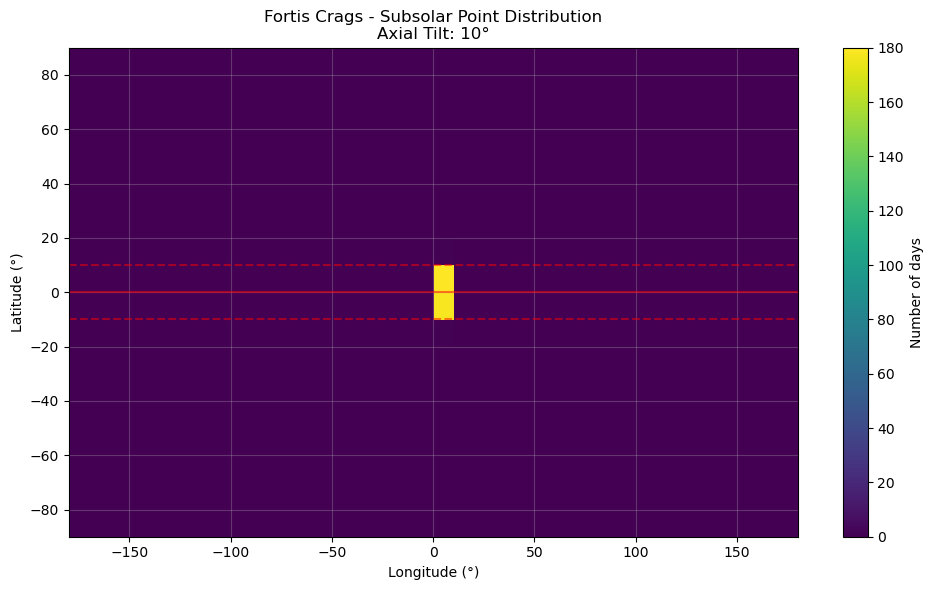

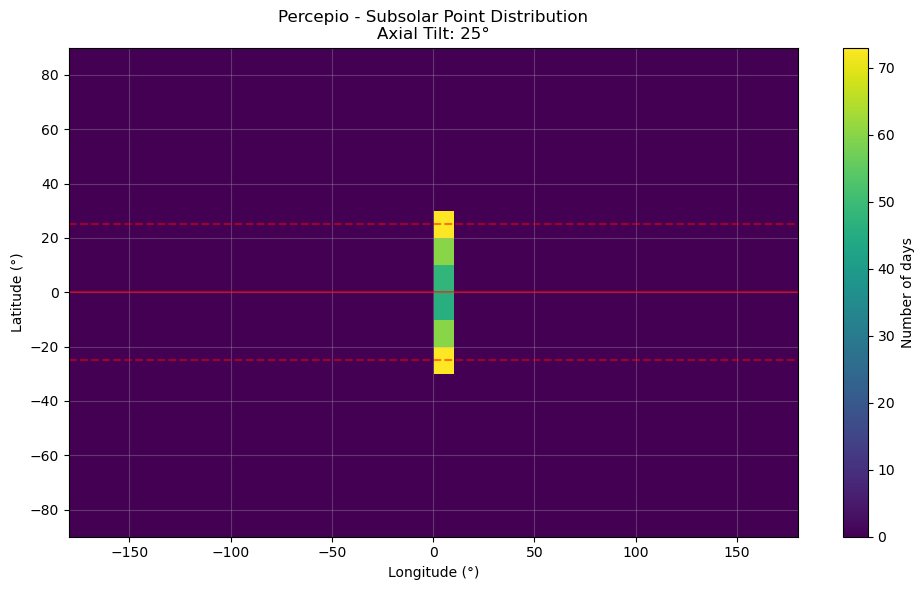

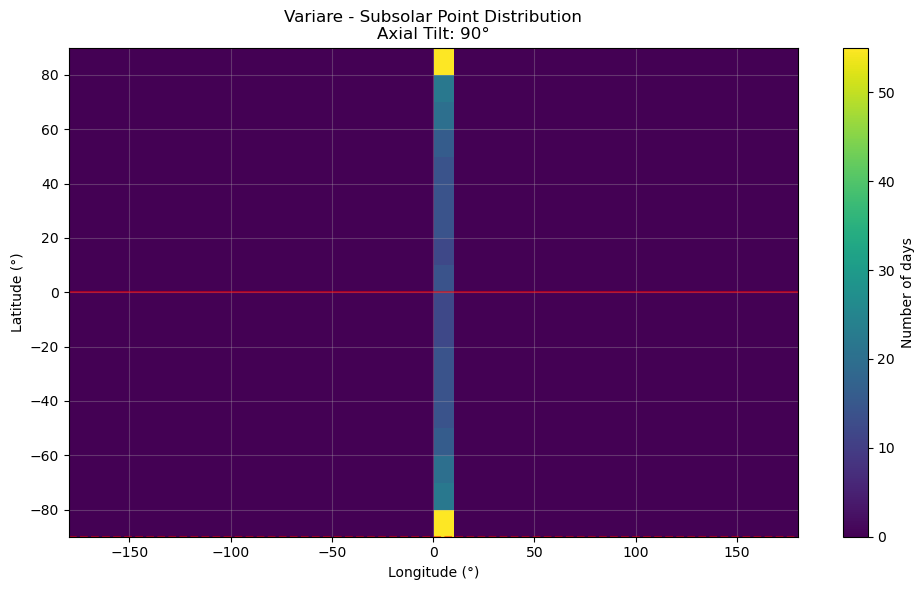

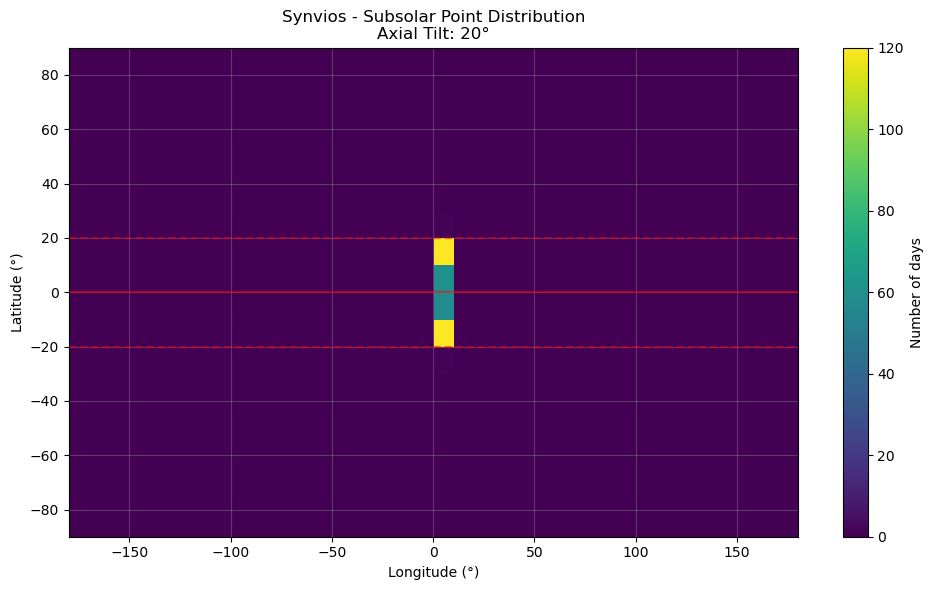

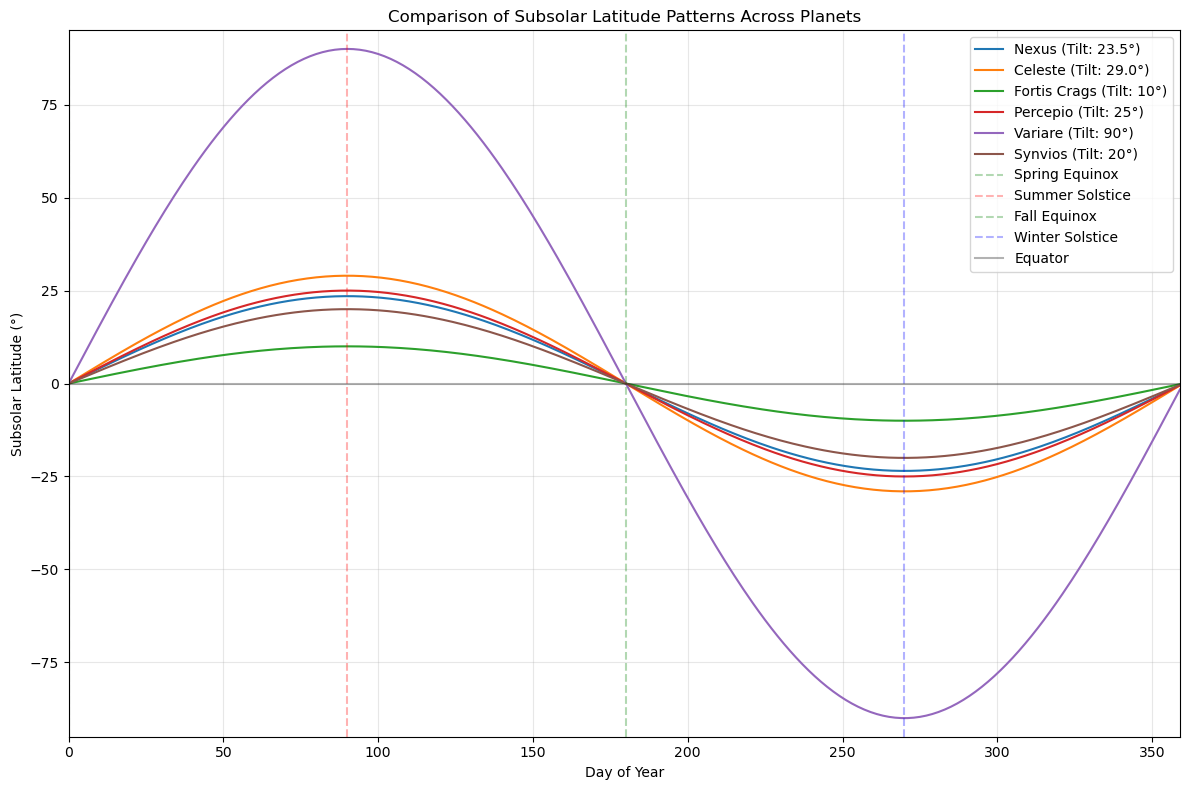

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from Solar import create_standard_system

def analyze_subsolar_points(year=0):
    # Create the standard solar system
    solar_system = create_standard_system()
    
    # Dictionary to store results for each planet
    results = {}
    
    # Print planet information
    print("Planet information:")
    print("-" * 80)
    print(f"{'Planet':<15} {'Day Length (hrs)':<18} {'Axial Tilt (°)':<18} {'Local Days/Year':<18}")
    print("-" * 80)
    
    for planet in solar_system.planets:
        # Calculate local days per year
        days_per_year = planet.get_days_per_year()
        
        print(f"{planet.name:<15} {planet.rotation_period:<18.2f} {planet.initial_axial_tilt:<18.2f} {days_per_year:<18.2f}")
        
        # Initialize arrays to store subsolar points for each Nexus day
        days = np.arange(0, 360)
        latitudes = np.zeros_like(days, dtype=float)
        longitudes = np.zeros_like(days, dtype=float)
        
        # Calculate subsolar point for each day at noon
        for i, day in enumerate(days):
            lat, lon = planet.get_subsolar_point(year, day, 12, 0)
            latitudes[i] = lat
            longitudes[i] = lon
        
        # Store data for this planet
        results[planet.name] = {
            'days': days,
            'latitudes': latitudes,
            'longitudes': longitudes,
            'axial_tilt': planet.initial_axial_tilt,
            'rotation_period': planet.rotation_period,
            'days_per_year': days_per_year
        }
    
    # Print subsolar point analysis
    print("\nSubsolar Point Analysis:")
    print("-" * 80)
    print(f"{'Planet':<15} {'Min Lat (°)':<15} {'Max Lat (°)':<15} {'Lat Range (°)':<15}")
    print("-" * 80)
    
    for planet_name, data in results.items():
        min_lat = np.min(data['latitudes'])
        max_lat = np.max(data['latitudes'])
        lat_range = max_lat - min_lat
        
        print(f"{planet_name:<15} {min_lat:<15.2f} {max_lat:<15.2f} {lat_range:<15.2f}")
    
    # Create plots
    create_plots(results)
    
    return results

def create_plots(results):
    # Create a figure for latitude vs day plots
    plt.figure(figsize=(15, 10))
    plt.suptitle('Subsolar Latitude Throughout the Year', fontsize=16)
    
    # Setup grid for subplots
    grid = gridspec.GridSpec(3, 2)
    
    # Plot each planet
    for i, (planet_name, data) in enumerate(results.items()):
        # Create subplot
        ax = plt.subplot(grid[i//2, i%2])
        
        # Plot latitude vs day
        ax.plot(data['days'], data['latitudes'], 'b-', linewidth=2)
        
        # Add horizontal lines at equator and maximum declination
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)  # Equator
        ax.axhline(y=data['axial_tilt'], color='r', linestyle='--', alpha=0.5)  # Max tilt
        ax.axhline(y=-data['axial_tilt'], color='r', linestyle='--', alpha=0.5)  # Min tilt
        
        # Add equinox and solstice markers
        ax.axvline(x=0, color='g', linestyle='--', alpha=0.5)    # Spring equinox
        ax.axvline(x=90, color='r', linestyle='--', alpha=0.5)   # Summer solstice
        ax.axvline(x=180, color='g', linestyle='--', alpha=0.5)  # Fall equinox
        ax.axvline(x=270, color='b', linestyle='--', alpha=0.5)  # Winter solstice
        
        # Set labels and title
        ax.set_xlabel('Day of Year')
        ax.set_ylabel('Latitude (°)')
        ax.set_title(f"{planet_name}\nTilt: {data['axial_tilt']}°, Days/Year: {data['days_per_year']:.1f}")
        
        # Set axis limits
        ax.set_xlim(0, 359)
        max_tilt = max(abs(data['axial_tilt']), 25)  # Ensure we see at least ±25° for planets with low tilt
        ax.set_ylim(-max_tilt * 1.1, max_tilt * 1.1)
        
        # Add grid
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
    plt.savefig('subsolar_latitudes.png')
    
    # Create individual heatmaps showing subsolar point distribution
    for planet_name, data in results.items():
        plt.figure(figsize=(10, 6))
        
        # Create 2D histogram of subsolar points
        H, xedges, yedges = np.histogram2d(
            data['longitudes'], 
            data['latitudes'], 
            bins=[36, 18], 
            range=[[-180, 180], [-90, 90]]
        )
        
        # Plot heatmap
        plt.imshow(
            H.T, 
            origin='lower', 
            aspect='auto',
            extent=[-180, 180, -90, 90],
            cmap='viridis'
        )
        
        # Add colorbar
        plt.colorbar(label='Number of days')
        
        # Add equator and tropic lines
        plt.axhline(y=0, color='r', linestyle='-', alpha=0.5)  # Equator
        plt.axhline(y=data['axial_tilt'], color='r', linestyle='--', alpha=0.5)  # Tropic of Cancer
        plt.axhline(y=-data['axial_tilt'], color='r', linestyle='--', alpha=0.5)  # Tropic of Capricorn
        
        # Set labels and title
        plt.xlabel('Longitude (°)')
        plt.ylabel('Latitude (°)')
        plt.title(f"{planet_name} - Subsolar Point Distribution\nAxial Tilt: {data['axial_tilt']}°")
        
        # Add grid
        plt.grid(True, alpha=0.3)
        
        # Save figure
        plt.tight_layout()
        plt.savefig(f'subsolar_distribution_{planet_name}.png')
    
    # Additional plot: Compare all planets' latitude patterns
    plt.figure(figsize=(12, 8))
    
    for planet_name, data in results.items():
        plt.plot(data['days'], data['latitudes'], label=f"{planet_name} (Tilt: {data['axial_tilt']}°)")
    
    # Add equinox and solstice markers
    plt.axvline(x=0, color='g', linestyle='--', alpha=0.3, label="Spring Equinox")
    plt.axvline(x=90, color='r', linestyle='--', alpha=0.3, label="Summer Solstice")
    plt.axvline(x=180, color='g', linestyle='--', alpha=0.3, label="Fall Equinox")
    plt.axvline(x=270, color='b', linestyle='--', alpha=0.3, label="Winter Solstice")
    
    # Add equator line
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, label="Equator")
    
    # Set labels and title
    plt.xlabel('Day of Year')
    plt.ylabel('Subsolar Latitude (°)')
    plt.title('Comparison of Subsolar Latitude Patterns Across Planets')
    
    # Add legend and grid
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    
    # Set axis limits
    plt.xlim(0, 359)
    plt.ylim(-95, 95)
    
    plt.tight_layout()
    plt.savefig('subsolar_comparison.png')

if __name__ == "__main__":
    results = analyze_subsolar_points()
    print("\nAnalysis complete. Plots saved to:")
    print("- subsolar_latitudes.png")
    print("- subsolar_comparison.png")
    for planet_name in results.keys():
        print(f"- subsolar_distribution_{planet_name}.png")
    
    plt.show()

Planet information:
--------------------------------------------------------------------------------
Planet          Day Length (hrs)   Axial Tilt (°)     Local Days/Year   
--------------------------------------------------------------------------------
Nexus           24.00              23.50              360.00            
Celeste         18.00              29.00              480.00            
Fortis Crags    48.00              10.00              180.00            
Percepio        6.00               25.00              1440.00           
Variare         12.00              90.00              720.00            
Synvios         20.00              20.00              432.00            

Subsolar Point Analysis:
--------------------------------------------------------------------------------
Planet          Min Lat (°)     Max Lat (°)     Lat Range (°)  
--------------------------------------------------------------------------------
Nexus           -23.50          23.50           47.00  

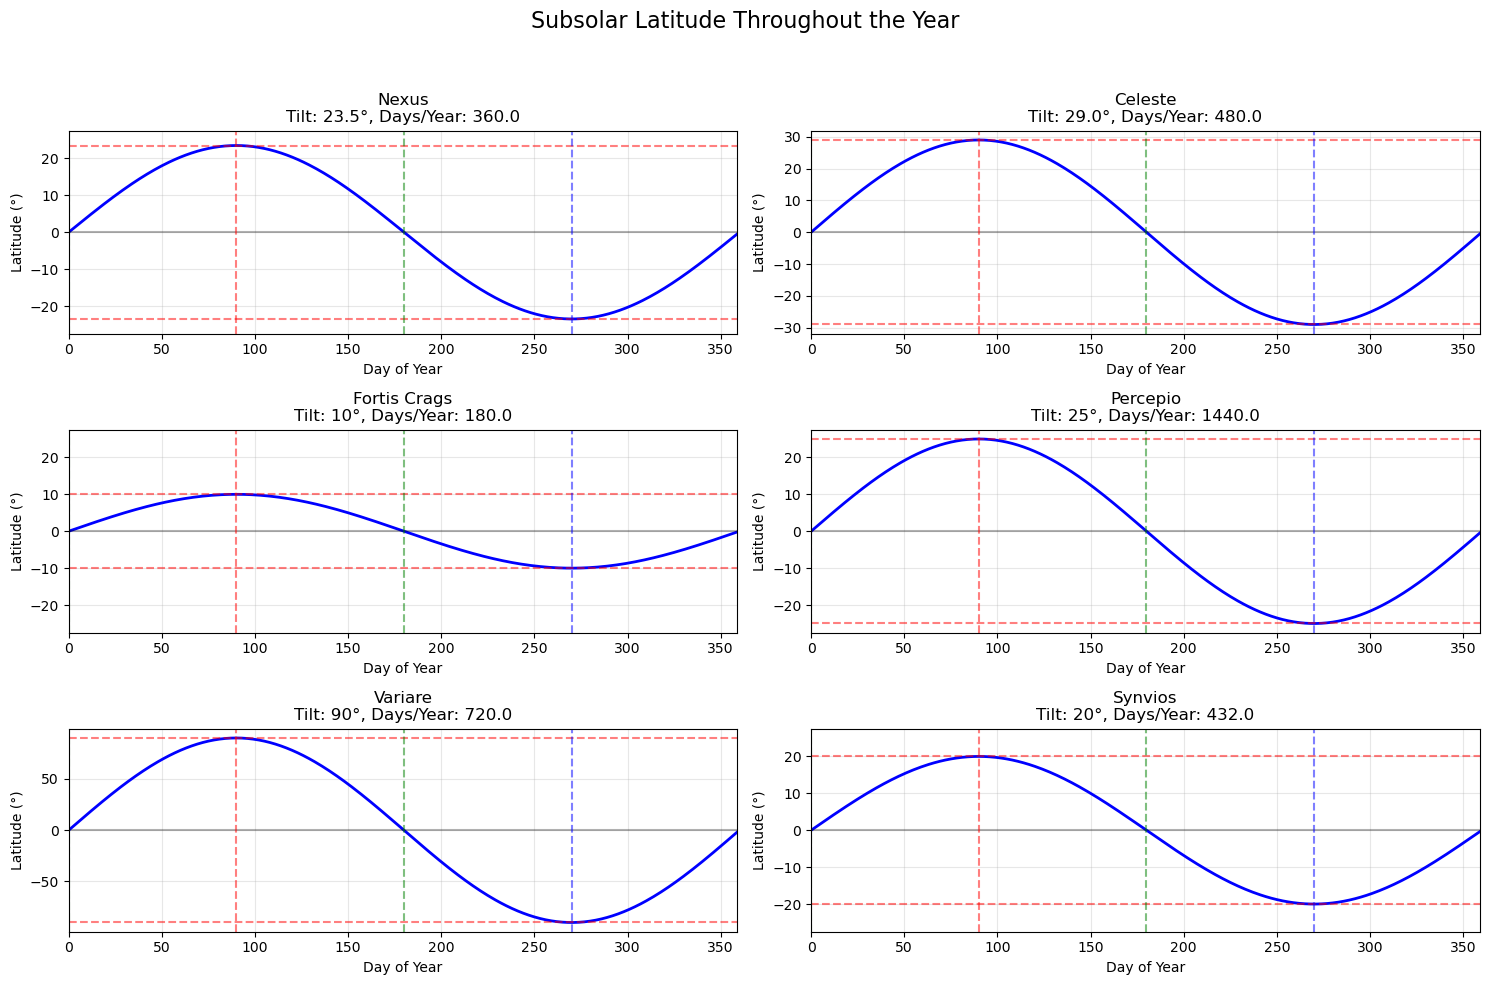

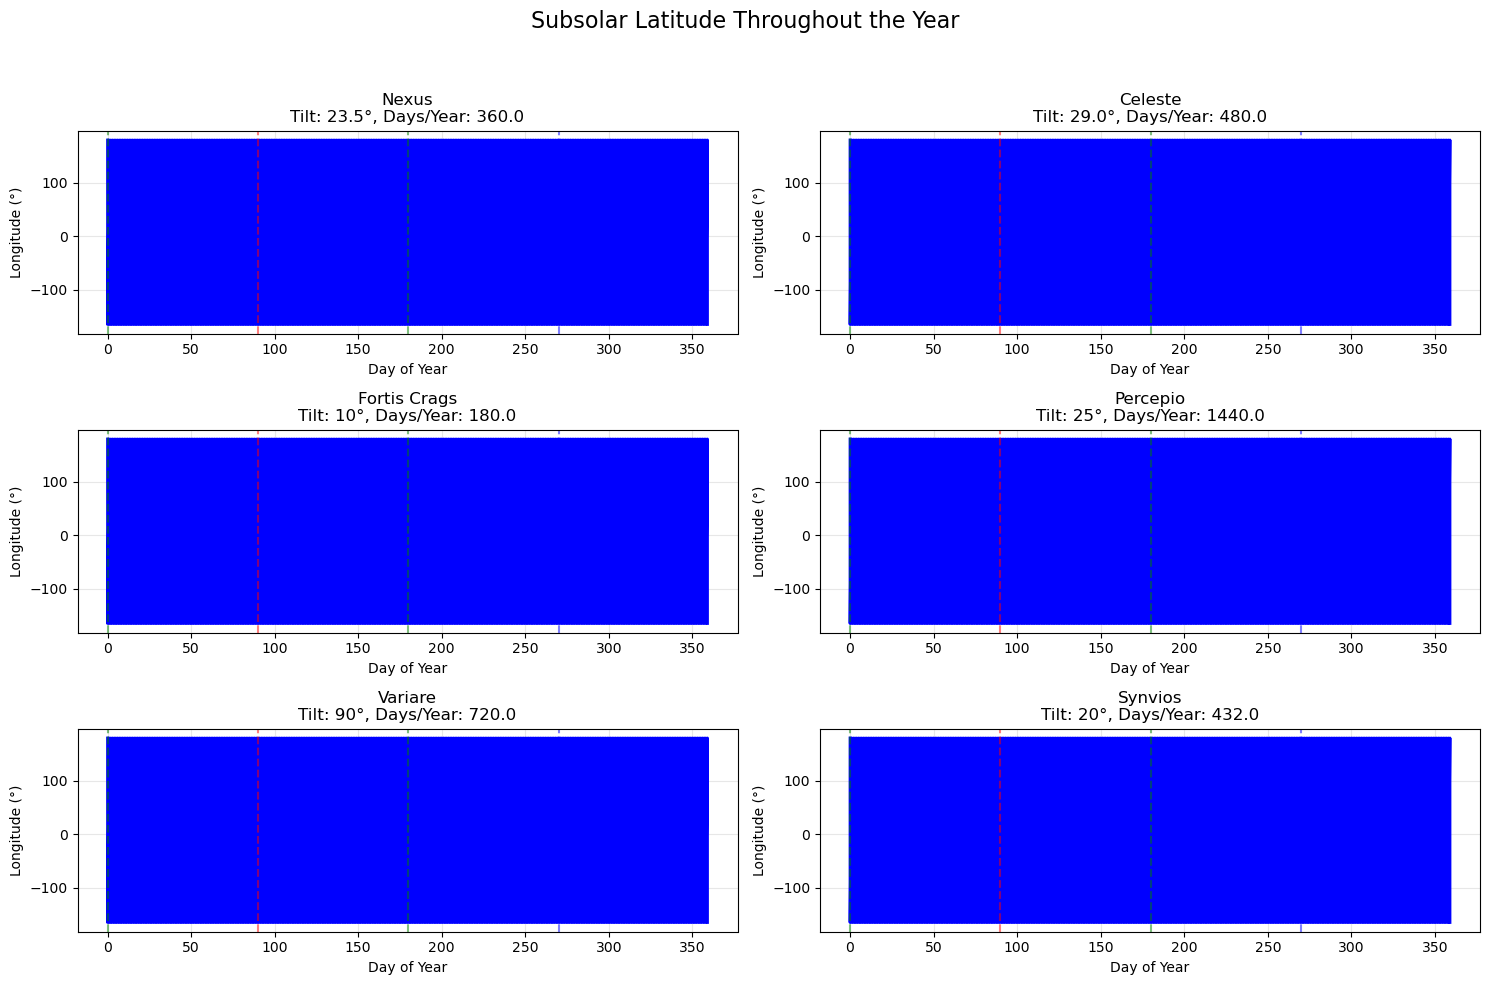

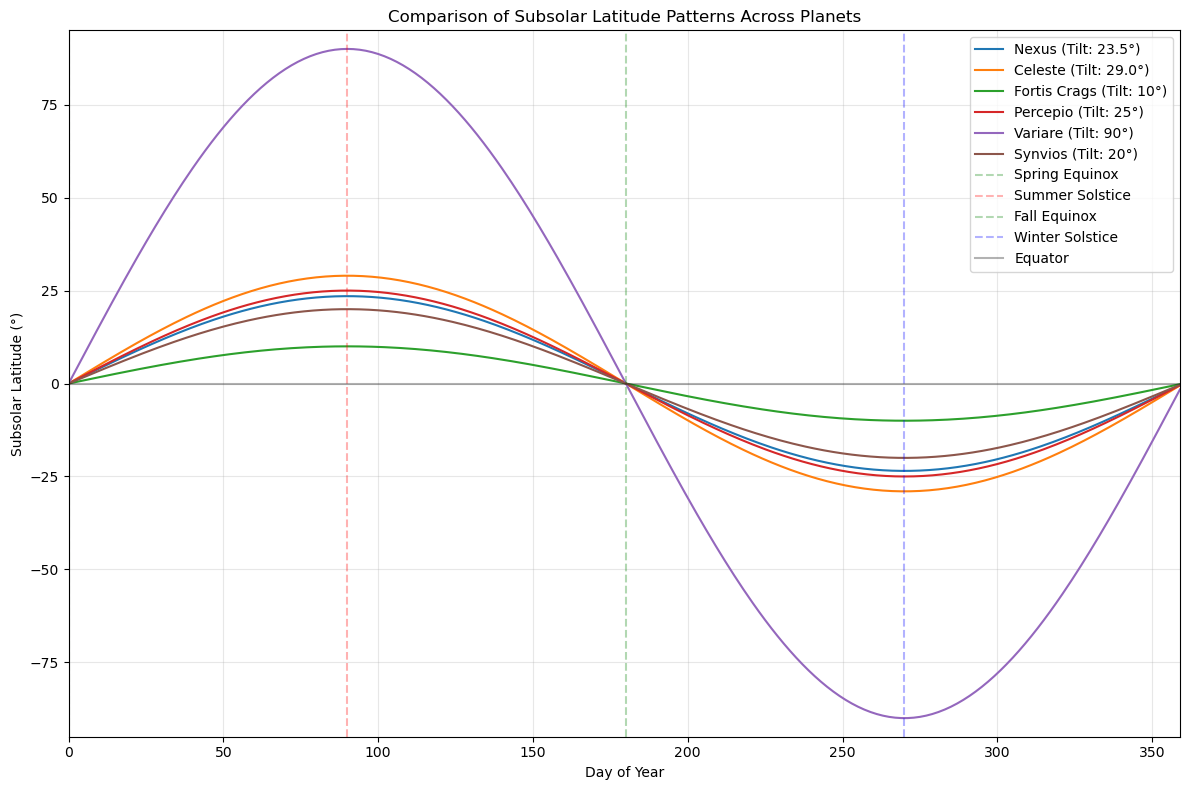

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from Solar import create_standard_system

def analyze_subsolar_points(year=0):
    # Create the standard solar system
    solar_system = create_standard_system()
    
    # Dictionary to store results for each planet
    results = {}
    
    # Print planet information
    print("Planet information:")
    print("-" * 80)
    print(f"{'Planet':<15} {'Day Length (hrs)':<18} {'Axial Tilt (°)':<18} {'Local Days/Year':<18}")
    print("-" * 80)
    
    for planet in solar_system.planets:
        # Calculate local days per year
        days_per_year = planet.get_days_per_year()
        
        print(f"{planet.name:<15} {planet.rotation_period:<18.2f} {planet.initial_axial_tilt:<18.2f} {days_per_year:<18.2f}")
        
        # Initialize arrays to store subsolar points for each Nexus day
        days = np.arange(0, 360)
        latitudes = np.zeros_like(days, dtype=float)
        longitudes = np.zeros_like(days, dtype=float)
        
        # Calculate subsolar point for each day at multiple hours
        # We'll sample 24 hours per day to get a complete picture of longitude movement
        hours_per_day_samples = 24
        
        # Arrays to store multiple samples per day
        all_latitudes = []
        all_longitudes = []
        all_day_indices = []
        
        for i, day in enumerate(days):
            # Sample multiple times throughout the day to see longitude changes
            for hour_idx in range(hours_per_day_samples):
                hour = hour_idx * (24 / hours_per_day_samples)
                lat, lon = planet.get_subsolar_point(year, day, hour, 0)
                all_latitudes.append(lat)
                all_longitudes.append(lon)
                all_day_indices.append(day)
            
            # For the main day arrays, just use noon value (12:00)
            lat, lon = planet.get_subsolar_point(year, day, 12, 0)
            latitudes[i] = lat
            longitudes[i] = lon
        
        # Store data for this planet
        results[planet.name] = {
            'days': days,
            'latitudes': latitudes,
            'longitudes': longitudes,
            'all_day_indices': np.array(all_day_indices),
            'all_latitudes': np.array(all_latitudes),
            'all_longitudes': np.array(all_longitudes),
            'axial_tilt': planet.initial_axial_tilt,
            'rotation_period': planet.rotation_period,
            'days_per_year': days_per_year
        }
    
    # Print subsolar point analysis
    print("\nSubsolar Point Analysis:")
    print("-" * 80)
    print(f"{'Planet':<15} {'Min Lat (°)':<15} {'Max Lat (°)':<15} {'Lat Range (°)':<15}")
    print("-" * 80)
    
    for planet_name, data in results.items():
        min_lat = np.min(data['latitudes'])
        max_lat = np.max(data['latitudes'])
        lat_range = max_lat - min_lat
        
        print(f"{planet_name:<15} {min_lat:<15.2f} {max_lat:<15.2f} {lat_range:<15.2f}")
    
    # Create plots
    create_plots(results)
    
    return results

def create_plots(results):
    # Create a figure for latitude vs day plots
    plt.figure(figsize=(15, 10))
    plt.suptitle('Subsolar Latitude Throughout the Year', fontsize=16)
    
    # Setup grid for subplots
    grid = gridspec.GridSpec(3, 2)
    
    # Plot each planet
    for i, (planet_name, data) in enumerate(results.items()):
        # Create subplot
        ax = plt.subplot(grid[i//2, i%2])
        
        # Plot latitude vs day
        ax.plot(data['all_day_indices'], data['all_latitudes'], 'b-', linewidth=2)
        
        # Add horizontal lines at equator and maximum declination
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)  # Equator
        ax.axhline(y=data['axial_tilt'], color='r', linestyle='--', alpha=0.5)  # Max tilt
        ax.axhline(y=-data['axial_tilt'], color='r', linestyle='--', alpha=0.5)  # Min tilt
        
        # Add equinox and solstice markers
        ax.axvline(x=0, color='g', linestyle='--', alpha=0.5)    # Spring equinox
        ax.axvline(x=90, color='r', linestyle='--', alpha=0.5)   # Summer solstice
        ax.axvline(x=180, color='g', linestyle='--', alpha=0.5)  # Fall equinox
        ax.axvline(x=270, color='b', linestyle='--', alpha=0.5)  # Winter solstice
        
        # Set labels and title
        ax.set_xlabel('Day of Year')
        ax.set_ylabel('Latitude (°)')
        ax.set_title(f"{planet_name}\nTilt: {data['axial_tilt']}°, Days/Year: {data['days_per_year']:.1f}")
        
        # Set axis limits
        ax.set_xlim(0, 359)
        max_tilt = max(abs(data['axial_tilt']), 25)  # Ensure we see at least ±25° for planets with low tilt
        ax.set_ylim(-max_tilt * 1.1, max_tilt * 1.1)
        
        # Add grid
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
    # Create a figure for latitude vs day plots
    plt.figure(figsize=(15, 10))
    plt.suptitle('Subsolar Latitude Throughout the Year', fontsize=16)
    
    # Setup grid for subplots
    grid = gridspec.GridSpec(3, 2)
    
    # Plot each planet
    for i, (planet_name, data) in enumerate(results.items()):
        # Create subplot
        ax = plt.subplot(grid[i//2, i%2])
        
        # Plot latitude vs day
        ax.plot(data['all_day_indices'], data['all_longitudes'], 'b-', linewidth=2)
        
        # Add equinox and solstice markers
        ax.axvline(x=0, color='g', linestyle='--', alpha=0.5)    # Spring equinox
        ax.axvline(x=90, color='r', linestyle='--', alpha=0.5)   # Summer solstice
        ax.axvline(x=180, color='g', linestyle='--', alpha=0.5)  # Fall equinox
        ax.axvline(x=270, color='b', linestyle='--', alpha=0.5)  # Winter solstice
        
        # Set labels and title
        ax.set_xlabel('Day of Year')
        ax.set_ylabel('Longitude (°)')
        ax.set_title(f"{planet_name}\nTilt: {data['axial_tilt']}°, Days/Year: {data['days_per_year']:.1f}")
        
        # Add grid
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
    
    # Additional plot: Compare all planets' latitude patterns
    plt.figure(figsize=(12, 8))
    
    for planet_name, data in results.items():
        plt.plot(data['days'], data['latitudes'], label=f"{planet_name} (Tilt: {data['axial_tilt']}°)")
    
    # Add equinox and solstice markers
    plt.axvline(x=0, color='g', linestyle='--', alpha=0.3, label="Spring Equinox")
    plt.axvline(x=90, color='r', linestyle='--', alpha=0.3, label="Summer Solstice")
    plt.axvline(x=180, color='g', linestyle='--', alpha=0.3, label="Fall Equinox")
    plt.axvline(x=270, color='b', linestyle='--', alpha=0.3, label="Winter Solstice")
    
    # Add equator line
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, label="Equator")
    
    # Set labels and title
    plt.xlabel('Day of Year')
    plt.ylabel('Subsolar Latitude (°)')
    plt.title('Comparison of Subsolar Latitude Patterns Across Planets')
    
    # Add legend and grid
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    
    # Set axis limits
    plt.xlim(0, 359)
    plt.ylim(-95, 95)
    
    plt.tight_layout()


results = analyze_subsolar_points()
print("\nAnalysis complete. Plots saved to:")
print("- subsolar_latitudes.png")
print("- subsolar_comparison.png")
for planet_name in results.keys():
    print(f"- subsolar_distribution_{planet_name}.png")
plt.show()

Nexus
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4]
Celeste
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4]
Fortis Crags
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4]
Percepio
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4]
Variare
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

Text(0, 0.5, 'Longitude (°)')

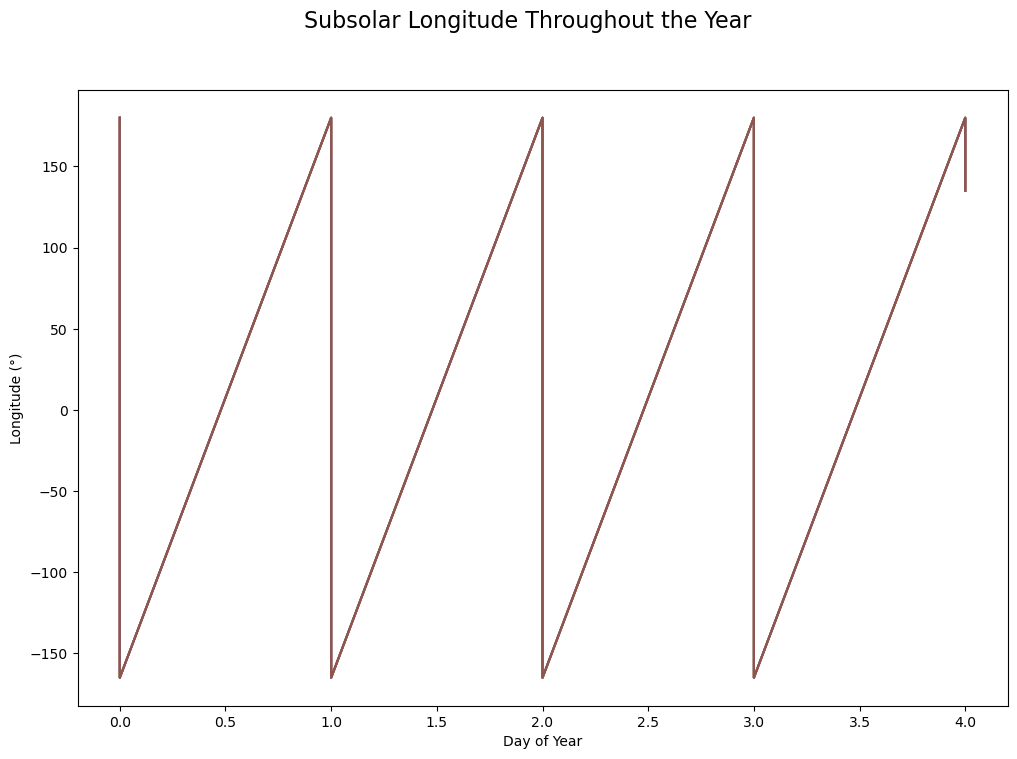

In [35]:
i=100
# Plot the subsolar longitude across time for each planet on one plot for six days
plt.figure(figsize=(12, 8))
for planet_name, data in results.items():
    plt.plot(data['all_day_indices'][:i], data['all_longitudes'][:i], label=f"{planet_name} (Tilt: {data['axial_tilt']}°)")
    print(planet_name)
    print(data['all_day_indices'][:i])
    
plt.suptitle('Subsolar Longitude Throughout the Year', fontsize=16)
plt.legend
# Set labels and title
plt.xlabel('Day of Year')
plt.ylabel('Longitude (°)')

In [111]:
import math

def subsolar_latitude(axial_tilt, t):
    """
    Compute the subsolar latitude at time t (in nexus days).
    Latitude oscillates sinusoidally between -axial_tilt and +axial_tilt.
    """
    return axial_tilt * math.sin((2 * math.pi * t) / 360)

def subsolar_longitude(rotation_period, t):
    """
    Compute the subsolar longitude at time t (in nexus days).
    The planet rotates 360° in its rotation period (given in nexus hours),
    so the rate (in degrees per nexus day) is (360 * 24) / rotation_period.
    The longitude is taken modulo 360.
    """
    rate = (360 * 24) / rotation_period
    return (rate * t) % 360

def great_circle_distance(lat1, lon1, lat2, lon2, radius):
    """
    Compute the great-circle distance between two points on a sphere.
    Latitudes and longitudes are in degrees and radius is in km.
    """
    # Convert degrees to radians
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_lambda = math.radians(lon2 - lon1)
    
    # Spherical law of cosines
    central_angle = math.acos(math.sin(phi1) * math.sin(phi2) +
                              math.cos(phi1) * math.cos(phi2) * math.cos(delta_lambda))
    return radius * central_angle

# Define each planet with its axial tilt (degrees), rotation period (nexus hours), and radius (km)
planets = {
    "Nexus": {"axial_tilt": -2, "rotation_period": 24, "radius": 6400}, #23.5
    "Celeste": {"axial_tilt": 29, "rotation_period": 27, "radius": 6600},
    "Fortis Crags": {"axial_tilt": -10, "rotation_period": 45, "radius": 6100},
    "Percepio": {"axial_tilt": -26, "rotation_period": 10, "radius": 6400},
    "Variare": {"axial_tilt": 90, "rotation_period": 15, "radius": 6200},
    "Synvios": {"axial_tilt": 20, "rotation_period": 20, "radius": 6300},
}

# Compute subsolar positions for days 0 through 5 for each planet.
days = list(range(5))
positions = {}  # {planet: [(day, lat, lon), ...], ...}

for planet, params in planets.items():
    positions[planet] = []
    for t in days:
        lat = subsolar_latitude(params["axial_tilt"], t)
        lon = subsolar_longitude(params["rotation_period"], t)
        positions[planet].append((t, lat, lon))

# For each planet, compute for each point the distance to its "nearest neighbor"
# (i.e. the closest of the other five points) except for Nexus,
# where we compute the distance to its "furthest neighbor".
print("Distances for each planet's subsolar points:")

for planet, pos_list in positions.items():
    radius = planets[planet]["radius"]
    print(f"\n{planet}:")
    for i, (t, lat, lon) in enumerate(pos_list):
        # Compute distances from this point to all other points on the same planet
        distances = []
        for j, (t2, lat2, lon2) in enumerate(pos_list):
            if i == j:
                continue
            d = great_circle_distance(lat, lon, lat2, lon2, radius)
            distances.append(d)
            
        furthest_distance = max(distances)
        nearest_distance = min(distances)
        print(f" Day {t:2d}: Latitude: {lat:6.2f}°, Longitude: {lon:6.2f}°, Nearest: {nearest_distance:.2f} km, Furthest: {furthest_distance:.2f} km")


Distances for each planet's subsolar points:

Nexus:
 Day  0: Latitude:  -0.00°, Longitude:   0.00°, Nearest: 3.90 km, Furthest: 15.58 km
 Day  1: Latitude:  -0.03°, Longitude:   0.00°, Nearest: 3.90 km, Furthest: 11.68 km
 Day  2: Latitude:  -0.07°, Longitude:   0.00°, Nearest: 3.90 km, Furthest: 7.80 km
 Day  3: Latitude:  -0.10°, Longitude:   0.00°, Nearest: 3.89 km, Furthest: 11.69 km
 Day  4: Latitude:  -0.14°, Longitude:   0.00°, Nearest: 3.89 km, Furthest: 15.58 km

Celeste:
 Day  0: Latitude:   0.00°, Longitude:   0.00°, Nearest: 4607.98 km, Furthest: 18419.40 km
 Day  1: Latitude:   0.51°, Longitude: 320.00°, Nearest: 4607.60 km, Furthest: 13818.11 km
 Day  2: Latitude:   1.01°, Longitude: 280.00°, Nearest: 4606.85 km, Furthest: 9215.52 km
 Day  3: Latitude:   1.52°, Longitude: 240.00°, Nearest: 4605.73 km, Furthest: 13821.67 km
 Day  4: Latitude:   2.02°, Longitude: 200.00°, Nearest: 4605.73 km, Furthest: 18419.40 km

Fortis Crags:
 Day  0: Latitude:  -0.00°, Longitude:   0.0

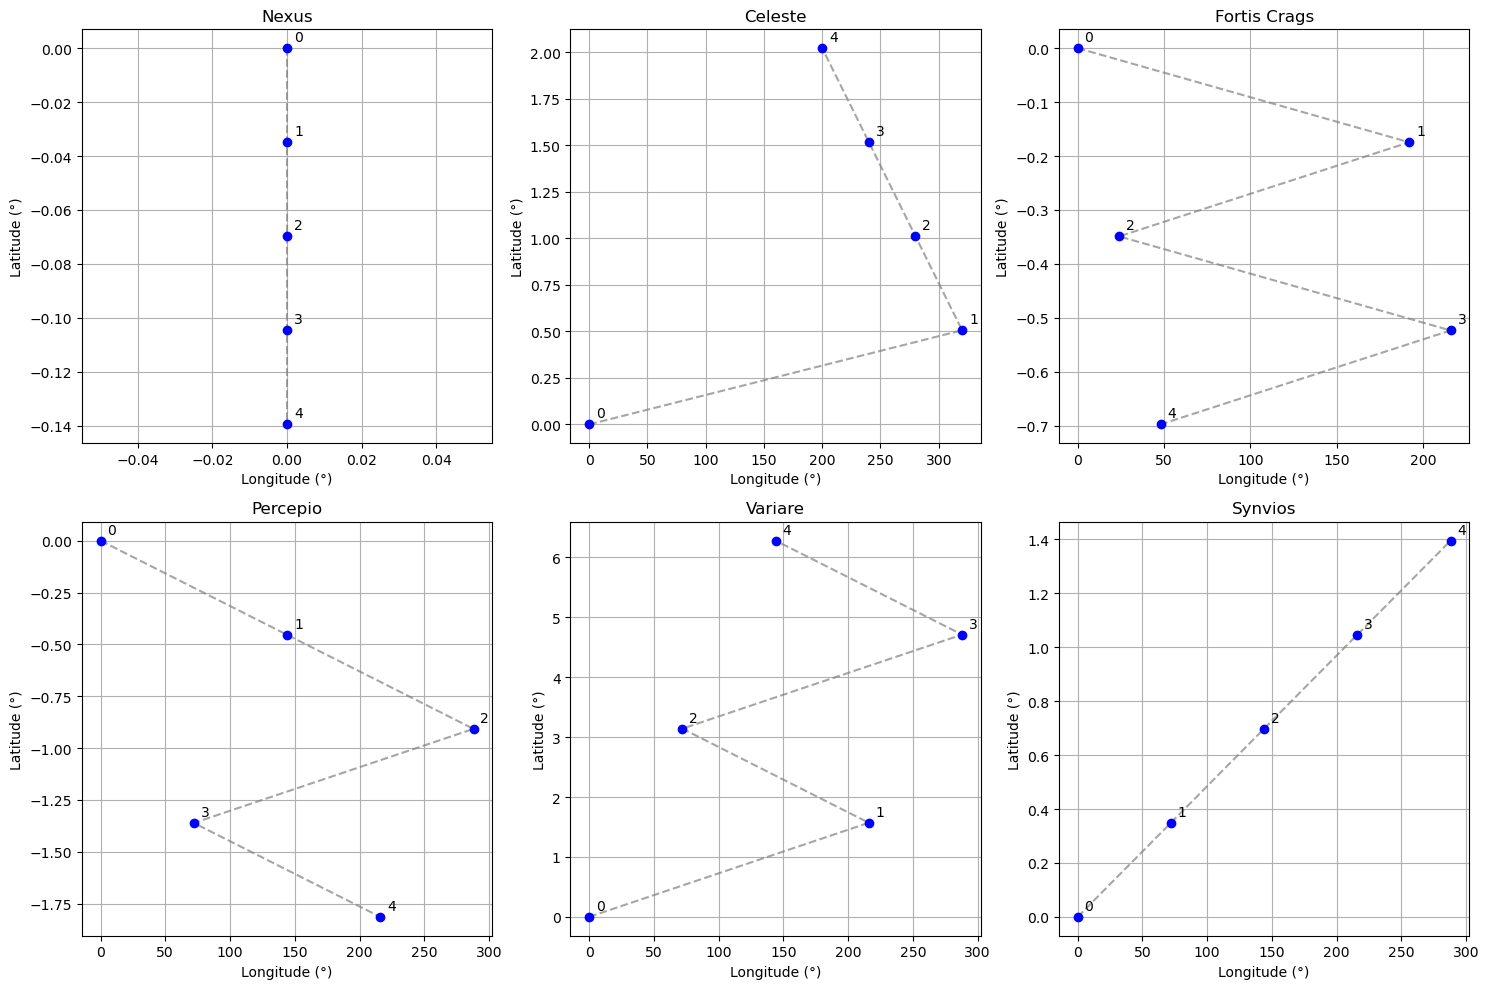

In [112]:
# Create a subplot grid (2 rows x 3 columns for our 6 planets)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, (planet, pos_list) in zip(axes, positions.items()):
    # Extract lists of latitudes and longitudes
    lats = [lat for (_, lat, lon) in pos_list]
    lons = [lon for (_, lat, lon) in pos_list]
    
    # Plot the points
    ax.scatter(lons, lats, marker='o', color='blue', zorder=5)
    # Connect the points to show the sequence (optional)
    ax.plot(lons, lats, linestyle='--', color='gray', alpha=0.7, zorder=3)
    
    # Annotate each point with its day number
    for (t, lat, lon) in pos_list:
        ax.annotate(str(t), (lon, lat), textcoords="offset points", xytext=(5, 5))
    
    # Configure the subplot
    ax.set_title(planet)
    ax.set_xlabel("Longitude (°)")
    ax.set_ylabel("Latitude (°)")
    ax.grid(True)
    #ax.set_xlim(0, 360)
    # Set y-limits based on the maximum axial tilt (with some padding)
    max_lat = max(abs(lat) for lat in lats)
    #ax.set_ylim(-max_lat - 5, max_lat + 5)

plt.tight_layout()
plt.show()